In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the train data and print the first few rows using head function
traindf=pd.read_excel('Flight_Train.xlsx')
traindf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
traindf.shape
#shape function tells us the number of rows and columns;here there are 10683 rows and 11 columns

(10683, 11)

In [4]:
traindf.isnull().sum()
#check if there's any null value; here there are no null values 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

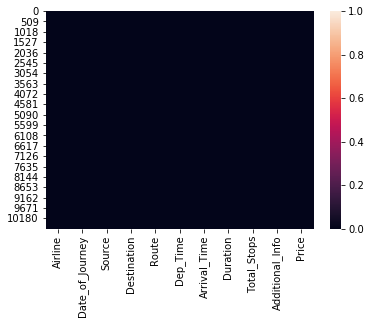

In [5]:
sns.heatmap(traindf.isnull())
#check the null value using heatmap; its clear from the heatmap that there are no null values

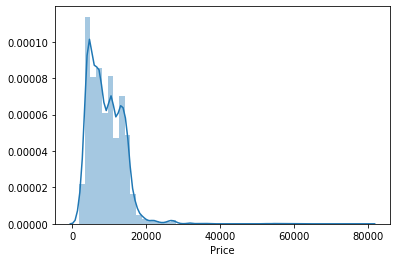

In [6]:
sns.distplot(traindf['Price'])
#plotting the target variable price using the heatmap

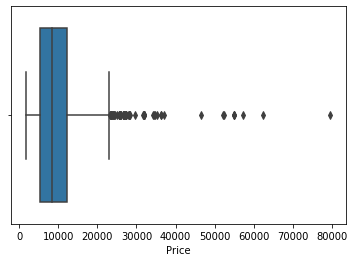

In [7]:
sns.boxplot(traindf['Price'])
#plotting a boxplot of the target variable price

In [8]:
#using boxcox in target variable price
from scipy.stats import boxcox
traindf['Price']=boxcox(traindf['Price'],0)

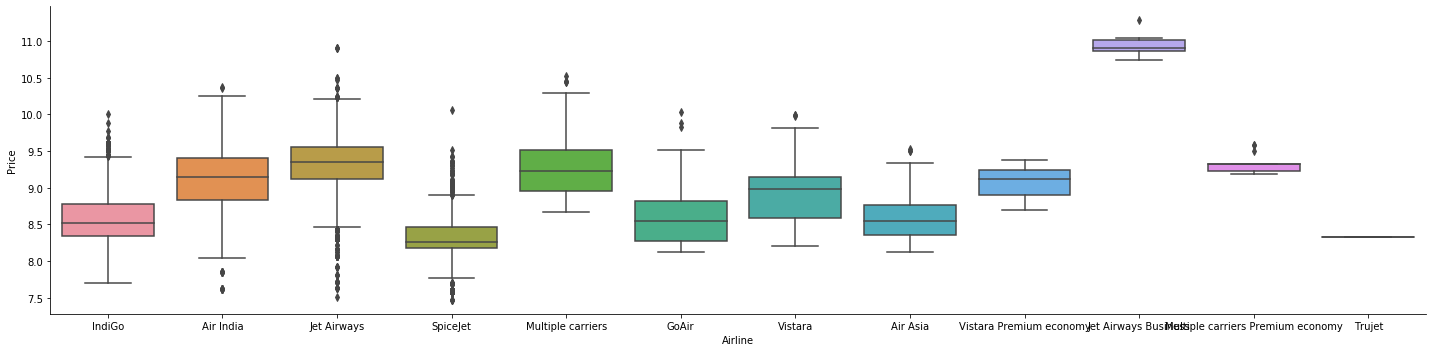

In [9]:
sns.catplot(x='Airline',y='Price',kind='box',data=traindf,height=5,aspect=4)
#plotting Airline Vs Price as boxplot;

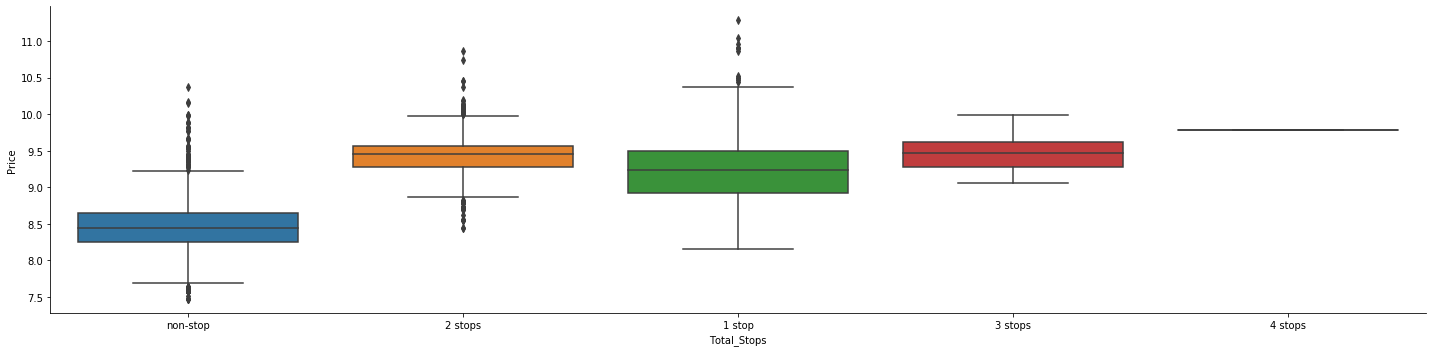

In [10]:
sns.catplot(x='Total_Stops',y='Price',kind='box',data=traindf,height=5,aspect=4)
#plotting boxplot for Total_Stops Vs Price

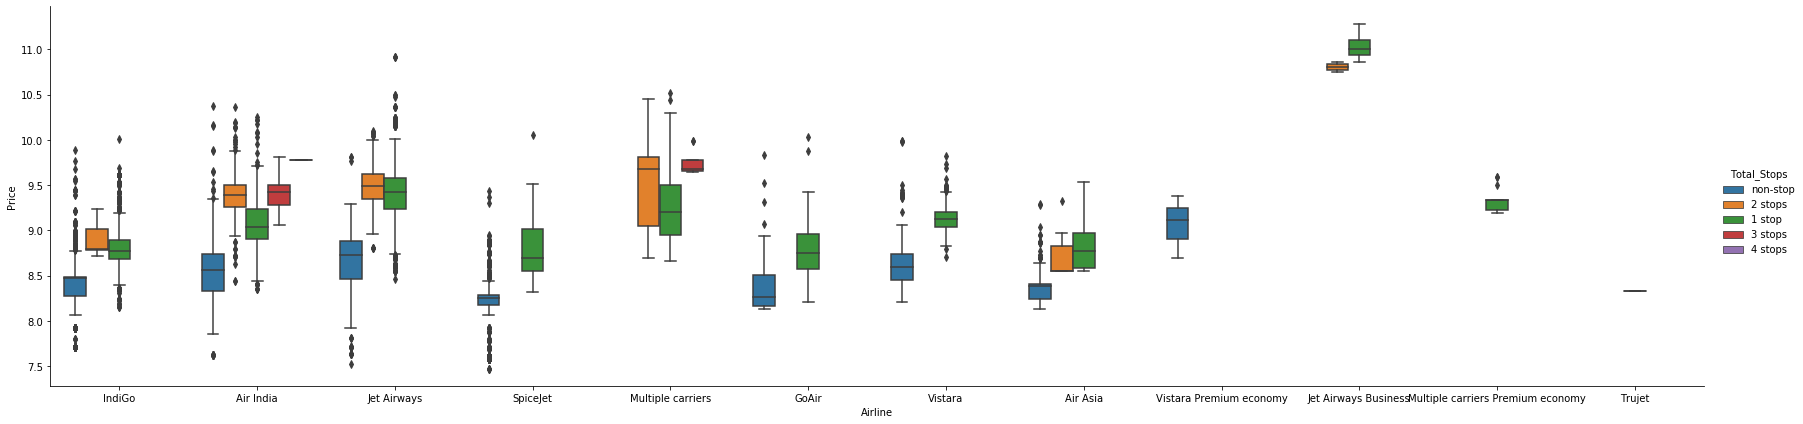

In [11]:
#plotting boxplot for Airline Vs Price
sns.catplot(x='Airline',y='Price',hue='Total_Stops',kind='box',data=traindf,height=6,aspect=4)

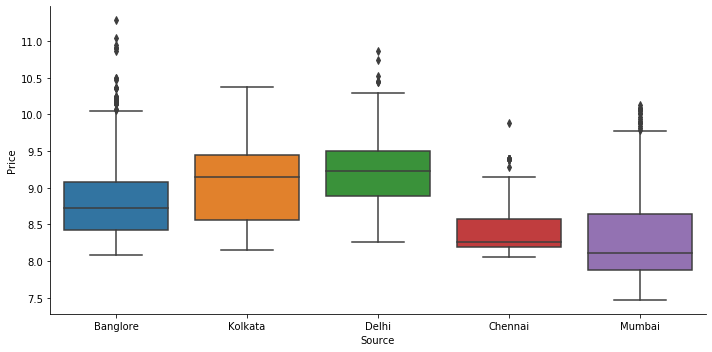

In [12]:
sns.catplot(x='Source',y='Price',kind='box',data=traindf,height=5,aspect=2)


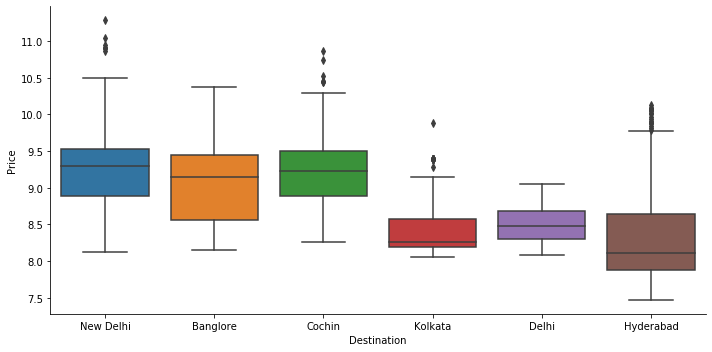

In [13]:

sns.catplot(x='Destination',y='Price',kind='box',data=traindf,height=5,aspect=2)

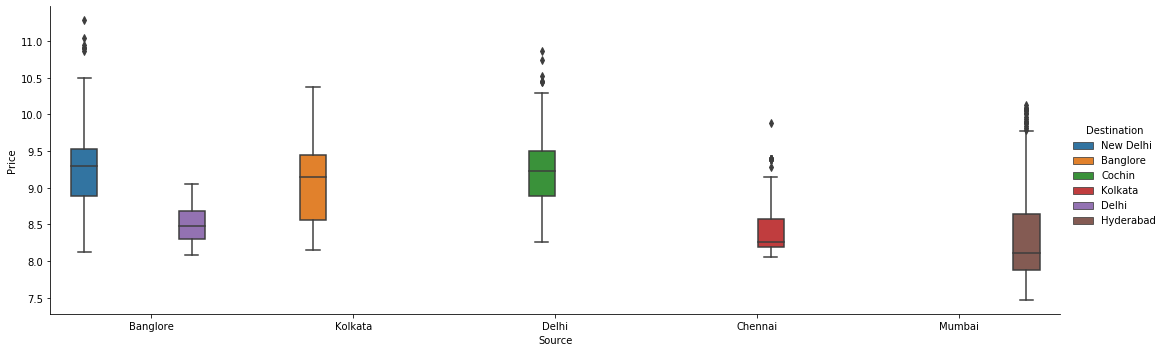

In [14]:
sns.catplot(x='Source',y='Price',hue='Destination',kind='box',data=traindf,height=5,aspect=3)
#boxplot of source vs price

In [15]:
#read the test data and print using head function
testdf=pd.read_excel('Flight_Test.xlsx')
testdf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [16]:
testdf.shape
#it shows the no of rows and columns; 

(2671, 10)

In [17]:
traindf['Data']='Train'
testdf['Data']='Test'
testdf['Price']=0

In [18]:
df=pd.concat([traindf,testdf])
#we are concating /joining both the dataset-traindf and testdf

In [19]:
df.head()
#print using head function

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Data
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,8.267962,Train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,8.944028,Train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,9.538348,Train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,8.735204,Train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,9.495670,Train


In [20]:
df.shape
#after concating the no of rows and columns are 13354 and 12 respectively

(13354, 12)

In [21]:
df.columns
#to print the name of the columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Data'],
      dtype='object')

In [22]:
#info function gives a concise summary of the dataframe; it shows the datatype of the columns and the count of non null values
df.info()
#here it shows that there are 1 float value and 11 object/string column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            13354 non-null  float64
 11  Data             13354 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.3+ MB


In [71]:
df.describe()

,Airline,Source,Destination,Additional_Info,Price,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,...,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
count,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.0,13354.000000,13354.000000,...,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000,13354.000000
mean,3.977086,1.954096,1.435450,6.592482,7.191181,13.389846,4.710574,2019.0,13.396061,24.664146,...,24.507264,10.234686,28.340947,2.015651,11.915681,11.571664,10.938071,3.987345,0.999850,0.825970
std,2.363997,1.178607,1.473368,0.824451,3.625118,8.439060,1.165622,0.0,6.896145,16.559723,...,18.832385,8.474288,16.906576,1.205399,8.035899,9.035316,2.602641,0.203479,0.012238,0.674644
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2019.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,7.000000,8.195610,6.000000,3.000000,2019.0,8.000000,10.000000,...,5.000000,2.000000,15.000000,1.000000,7.000000,4.000000,12.000000,4.000000,1.000000,0.000000
50%,4.000000,2.000000,1.000000,7.000000,8.833463,12.000000,5.000000,2019.0,14.000000,25.000000,...,25.000000,8.000000,30.000000,2.000000,7.000000,6.000000,12.000000,4.000000,1.000000,1.000000
75%,4.000000,3.000000,2.000000,7.000000,9.313529,21.000000,6.000000,2019.0,19.000000,35.000000,...,40.000000,15.000000,45.000000,3.000000,14.000000,24.000000,12.000000,4.000000,1.000000,1.000000
max,11.000000,4.000000,5.000000,8.000000,11.283663,27.000000,6.000000,2019.0,23.000000,55.000000,...,55.000000,47.000000,55.000000,5.000000,45.000000,30.000000,13.000000,5.000000,1.000000,4.000000


#From the above statistical table we can understand: We can see that for each column we have the following functions

count- Number of non-null observations here all the columns contain  13354 entries.

mean- Mean of Values here mean of each column is found ie, mean of Airline  column= 3.977086 , Source is 1.954096 etc

std- Standard Deviation of the Values here stnadard deviation for Airline is 2.363997 , Source is 1.178607 etc

min- Minimum value here it shows the min value for Airline is 0 , for Source is 0 etc

max- Maximum value it shows the max value for Airline as  11  , for Source is 4 etc

25%, 50%, and 75% - IQR values it shows percentile values at 25%,50% and 75% ; for Airline it is 3.000 , 4.000 and 4.000 respectively

Extracting Data From Date and Time

From Date_of_Journey

In [23]:
df['Date_of_journey']=df['Date_of_Journey'].str.split('/').str[0]

df['Month_of_journey']=df['Date_of_Journey'].str.split('/').str[1]

df['Year_of_journey']=df['Date_of_Journey'].str.split('/').str[2]

df.drop(['Date_of_Journey'],axis=1,inplace=True)


In [24]:
#From Arrival_Time

df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]

df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0]

df['Arrival_Minute']=df['Arrival_Time'].str.split(':').str[1]

df.drop(['Arrival_Time'],axis=1,inplace=True)

In [25]:
#From Dep_Time

df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]

df['Dep_Minute']=df['Dep_Time'].str.split(':').str[1]

df.drop(['Dep_Time'],axis=1,inplace=True)


In [26]:
#From Duration

df['Duration_hour']=df['Duration'].str.split('h').str[0]

df['Duration_hour'].value_counts()

2     2967
1      785
3      627
5      608
7      600
9      551
12     538
8      531
13     516
11     467
10     459
6      442
14     424
15     339
23     331
26     292
16     286
4      278
22     273
24     240
21     237
25     231
27     222
20     203
18     179
19     168
17     161
28     116
29      76
30      61
38      41
37      22
33      21
32      12
36      11
35      10
34       9
31       8
39       3
47       2
42       2
40       2
5m       2
41       1
Name: Duration_hour, dtype: int64

In [27]:
def change(data):
    if data=='5m':
        x='0'
    else:
        x=data
    return x

df['Duration_hour']=df['Duration_hour'].apply(lambda x:change(x))

In [28]:
df['Duration']=df['Duration'].str.split(' ').str[1]

df['Duration_minute']=df['Duration'].str.split('m').str[0]

df['Duration_minute'].fillna('0',inplace=True)

df.drop(['Duration'],axis=1,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Route             13353 non-null  object 
 4   Total_Stops       13353 non-null  object 
 5   Additional_Info   13354 non-null  object 
 6   Price             13354 non-null  float64
 7   Data              13354 non-null  object 
 8   Date_of_journey   13354 non-null  object 
 9   Month_of_journey  13354 non-null  object 
 10  Year_of_journey   13354 non-null  object 
 11  Arrival_Hour      13354 non-null  object 
 12  Arrival_Minute    13354 non-null  object 
 13  Dep_Hour          13354 non-null  object 
 14  Dep_Minute        13354 non-null  object 
 15  Duration_hour     13354 non-null  object 
 16  Duration_minute   13354 non-null  object 

In [29]:
df['Date_of_journey']=df['Date_of_journey'].astype(int)
df['Month_of_journey']=df['Month_of_journey'].astype(int)
df['Year_of_journey']=df['Year_of_journey'].astype(int)
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Minute']=df['Arrival_Minute'].astype(int)
df['Dep_Hour']=df['Dep_Hour'].astype(int)
df['Dep_Minute']=df['Dep_Minute'].astype(int)
df['Duration_hour']=df['Duration_hour'].astype(int)
df['Duration_minute']=df['Duration_minute'].astype(int)

In [30]:
df.info()
#after changing the datatype we can see that it has been changed to int values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Route             13353 non-null  object 
 4   Total_Stops       13353 non-null  object 
 5   Additional_Info   13354 non-null  object 
 6   Price             13354 non-null  float64
 7   Data              13354 non-null  object 
 8   Date_of_journey   13354 non-null  int32  
 9   Month_of_journey  13354 non-null  int32  
 10  Year_of_journey   13354 non-null  int32  
 11  Arrival_Hour      13354 non-null  int32  
 12  Arrival_Minute    13354 non-null  int32  
 13  Dep_Hour          13354 non-null  int32  
 14  Dep_Minute        13354 non-null  int32  
 15  Duration_hour     13354 non-null  int32  
 16  Duration_minute   13354 non-null  int32  

In [31]:
#Extracting Data From Route

df['Route'].value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
BOM → IXC → DEL → HYD             1
BOM → UDR → DEL → HYD             1
CCU → VTZ → BLR                   1
BOM → BLR → CCU → BBI → HYD       1
CCU → RPR → HYD → BLR             1
Name: Route, Length: 132, dtype: int64

In [32]:
df['Route_1']=df['Route'].str.split('→ ').str[0]

df['Route_2']=df['Route'].str.split('→ ').str[1]

df['Route_3']=df['Route'].str.split('→ ').str[2]

df['Route_4']=df['Route'].str.split('→ ').str[3]

df['Route_5']=df['Route'].str.split('→ ').str[4]

df['Route_6']=df['Route'].str.split('→ ').str[5]

df.drop(['Route'],axis=1,inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Total_Stops       13353 non-null  object 
 4   Additional_Info   13354 non-null  object 
 5   Price             13354 non-null  float64
 6   Data              13354 non-null  object 
 7   Date_of_journey   13354 non-null  int32  
 8   Month_of_journey  13354 non-null  int32  
 9   Year_of_journey   13354 non-null  int32  
 10  Arrival_Hour      13354 non-null  int32  
 11  Arrival_Minute    13354 non-null  int32  
 12  Dep_Hour          13354 non-null  int32  
 13  Dep_Minute        13354 non-null  int32  
 14  Duration_hour     13354 non-null  int32  
 15  Duration_minute   13354 non-null  int32  
 16  Route_1           13353 non-null  object 

In [34]:
df['Route_1'].fillna('None',inplace=True)
df['Route_2'].fillna('None',inplace=True)
df['Route_3'].fillna('None',inplace=True)
df['Route_4'].fillna('None',inplace=True)
df['Route_5'].fillna('None',inplace=True)
df['Route_6'].fillna('None',inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Route_1']=le.fit_transform(df['Route_1'])
df['Route_2']=le.fit_transform(df['Route_2'])
df['Route_3']=le.fit_transform(df['Route_3'])
df['Route_4']=le.fit_transform(df['Route_4'])
df['Route_5']=le.fit_transform(df['Route_5'])
df['Route_6']=le.fit_transform(df['Route_6'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Total_Stops       13353 non-null  object 
 4   Additional_Info   13354 non-null  object 
 5   Price             13354 non-null  float64
 6   Data              13354 non-null  object 
 7   Date_of_journey   13354 non-null  int32  
 8   Month_of_journey  13354 non-null  int32  
 9   Year_of_journey   13354 non-null  int32  
 10  Arrival_Hour      13354 non-null  int32  
 11  Arrival_Minute    13354 non-null  int32  
 12  Dep_Hour          13354 non-null  int32  
 13  Dep_Minute        13354 non-null  int32  
 14  Duration_hour     13354 non-null  int32  
 15  Duration_minute   13354 non-null  int32  
 16  Route_1           13354 non-null  int32  

In [37]:
#Total_Stops Column
#count the values in total stops

df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [38]:
df['Total_Stops'].replace(['non-stop'],['0 stop'],inplace=True)
#replacing non stop to numerical value 0
df['Total_Stops'].value_counts()

1 stop     7056
0 stop     4340
2 stops    1899
3 stops      56
4 stops       2
Name: Total_Stops, dtype: int64

In [39]:
df['Stops']=df['Total_Stops'].str.split(' ').str[0]


In [40]:
df['Stops'].isnull().sum()


1

In [41]:
df['Stops'].fillna('0',inplace=True)


In [42]:
df['Stops']=df['Stops'].astype(int)

df.drop(['Total_Stops'],axis=1,inplace=True)

In [43]:
#Source Column

df['Source'].value_counts()


Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

In [44]:
df['Source']=le.fit_transform(df['Source'])
#label encoding to fit the source data

In [45]:
#Airline Column

df['Airline'].value_counts()
#counting the number of variables in airline column

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [46]:
df['Airline']=le.fit_transform(df['Airline'])
#using label encoding

In [47]:
df.head(2)

,Airline,Source,Destination,Additional_Info,Price,Data,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,...,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,3,0,New Delhi,No info,8.267962,Train,24,3,2019,1,...,20,2,50,0,13,24,12,4,1,0
1,1,3,Banglore,No info,8.944028,Train,1,5,2019,13,...,50,7,25,2,25,1,3,4,1,2


In [48]:
#Additional_Info Column
df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
Red-eye flight                      1
1 Short layover                     1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [49]:
df['Additional_Info'].replace(['No Info'],['No info'],inplace=True)

df['Additional_Info']=le.fit_transform(df['Additional_Info'])

In [50]:
#Destination Column

df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [51]:
df['Destination']=le.fit_transform(df['Destination'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  int32  
 1   Source            13354 non-null  int32  
 2   Destination       13354 non-null  int32  
 3   Additional_Info   13354 non-null  int32  
 4   Price             13354 non-null  float64
 5   Data              13354 non-null  object 
 6   Date_of_journey   13354 non-null  int32  
 7   Month_of_journey  13354 non-null  int32  
 8   Year_of_journey   13354 non-null  int32  
 9   Arrival_Hour      13354 non-null  int32  
 10  Arrival_Minute    13354 non-null  int32  
 11  Dep_Hour          13354 non-null  int32  
 12  Dep_Minute        13354 non-null  int32  
 13  Duration_hour     13354 non-null  int32  
 14  Duration_minute   13354 non-null  int32  
 15  Route_1           13354 non-null  int32  
 16  Route_2           13354 non-null  int32  

In [53]:
Trainfinal=df.loc[df['Data']=='Train']
Trainfinal.drop(['Data'],axis=1,inplace=True)
Trainfinal.head()

,Airline,Source,Destination,Additional_Info,Price,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,...,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,3,0,5,7,8.267962,24,3,2019,1,10,...,20,2,50,0,13,24,12,4,1,0
1,1,3,0,7,8.944028,1,5,2019,13,15,...,50,7,25,2,25,1,3,4,1,2
2,4,2,1,7,9.538348,9,6,2019,4,25,...,25,19,0,3,32,4,5,4,1,2
3,3,3,0,7,8.735204,12,5,2019,23,30,...,5,5,25,2,34,3,12,4,1,1
4,3,0,5,7,9.495670,1,3,2019,21,35,...,50,4,45,0,34,8,12,4,1,1


In [54]:
Trainfinal.shape

(10683, 21)

In [55]:
Testfinal=df.loc[df['Data']=='Test']
Testfinal.drop(['Data','Price'],axis=1,inplace=True)
Testfinal.head()

,Airline,Source,Destination,Additional_Info,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,4,2,1,7,6,6,2019,4,25,17,30,10,55,3,7,6,12,4,1,1
1,3,3,0,7,12,5,2019,10,20,6,20,4,0,2,33,3,12,4,1,1
2,4,2,1,5,21,5,2019,19,0,19,15,23,45,3,7,6,12,4,1,1
3,6,2,1,7,21,5,2019,21,0,8,0,13,0,3,7,6,12,4,1,1
4,0,0,2,7,24,6,2019,2,45,23,55,2,50,0,13,24,12,4,1,0


In [56]:
Testfinal.shape

(2671, 20)

In [57]:
#Assigning x and y variables
x=Trainfinal.drop(['Price'],axis=True)
x.head()

,Airline,Source,Destination,Additional_Info,Date_of_journey,Month_of_journey,Year_of_journey,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hour,Duration_minute,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Stops
0,3,0,5,7,24,3,2019,1,10,22,20,2,50,0,13,24,12,4,1,0
1,1,3,0,7,1,5,2019,13,15,5,50,7,25,2,25,1,3,4,1,2
2,4,2,1,7,9,6,2019,4,25,9,25,19,0,3,32,4,5,4,1,2
3,3,3,0,7,12,5,2019,23,30,18,5,5,25,2,34,3,12,4,1,1
4,3,0,5,7,1,3,2019,21,35,16,50,4,45,0,34,8,12,4,1,1


In [58]:
x.shape

(10683, 20)

In [59]:
#scaling the input data x to fit in the model
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [60]:
y=Trainfinal['Price']
y.head()

0    8.267962
1    8.944028
2    9.538348
3    8.735204
4    9.495670
Name: Price, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=97)

In [63]:

print(x_train.shape,x_test.shape)

(7478, 20) (3205, 20)


In [64]:

print(y_train.shape,y_test.shape)

(7478,) (3205,)


Since we have to predict the flight price here, we will be using Linear Regression model

In [65]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [66]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=97)
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)
XGR=XGBRegressor(random_state=97)

In [67]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [68]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.6196211271633145
Mean_Squared_Error = 0.10104358469659225
Cross_Val_Score =  -2736960243126613.0


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -0.0004946397901461896
Mean_Squared_Error = 0.26577071465671653
Cross_Val_Score =  -0.0005635818888499733


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.6196164818479686
Mean_Squared_Error = 0.1010448186749967
Cross_Val_Score =  0.620541450940997


********

In [69]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
result
#printing the result in a dataframe

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.619621,0.101,-2.736960e+15
1,Lasso,-0.000495,0.266,-5.635819e-04
2,Ridge,0.619616,0.101,6.205415e-01
3,ElasticNet,-0.000495,0.266,-5.635819e-04
4,DecisionTreeRegressor,0.891232,0.029,9.104758e-01
5,KNeighborsRegressor,0.854004,0.039,8.704484e-01
6,AdaBoostRegressor,0.726240,0.073,6.814655e-01
7,RandomForestRegressor,0.930599,0.018,9.418665e-01
8,GradientBoostingRegressor,0.872411,0.034,8.720243e-01
9,XGBRegressor,0.871174,0.034,8.716960e-01


I Choose Random_Forest_Regressor as my final model because it perform very well on our dataset and also has less Mean_Squared_Error and Good Cross_val_score

R2_score = 0.930599

Mean_Squared_Error = 0.018

Cross_val_score = 9.418665e-01

In [70]:
#saving the model
from sklearn.externals import joblib
joblib.dump(RFR,'Model_Flight_ticket.pkl')

['Model_Flight_ticket.pkl']